In [1]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
# data normalization

X_train = X_train/255.0
X_test  = X_test/255.0

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(X_train, y_train,  
                    validation_data=(X_test, y_test),
                    batch_size=256, epochs=30, verbose=2)

Epoch 1/30
235/235 - 2s - loss: 0.5049 - sparse_categorical_accuracy: 0.8332 - val_loss: 0.5310 - val_sparse_categorical_accuracy: 0.8202 - 2s/epoch - 7ms/step
Epoch 2/30
235/235 - 1s - loss: 0.5027 - sparse_categorical_accuracy: 0.8341 - val_loss: 0.5295 - val_sparse_categorical_accuracy: 0.8210 - 829ms/epoch - 4ms/step
Epoch 3/30
235/235 - 1s - loss: 0.5006 - sparse_categorical_accuracy: 0.8343 - val_loss: 0.5272 - val_sparse_categorical_accuracy: 0.8224 - 839ms/epoch - 4ms/step
Epoch 4/30
235/235 - 1s - loss: 0.4986 - sparse_categorical_accuracy: 0.8353 - val_loss: 0.5258 - val_sparse_categorical_accuracy: 0.8214 - 909ms/epoch - 4ms/step
Epoch 5/30
235/235 - 1s - loss: 0.4967 - sparse_categorical_accuracy: 0.8354 - val_loss: 0.5236 - val_sparse_categorical_accuracy: 0.8224 - 864ms/epoch - 4ms/step
Epoch 6/30
235/235 - 1s - loss: 0.4947 - sparse_categorical_accuracy: 0.8365 - val_loss: 0.5225 - val_sparse_categorical_accuracy: 0.8231 - 880ms/epoch - 4ms/step
Epoch 7/30
235/235 - 1s -

In [5]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

Text(0, 0.5, 'Accuracy')

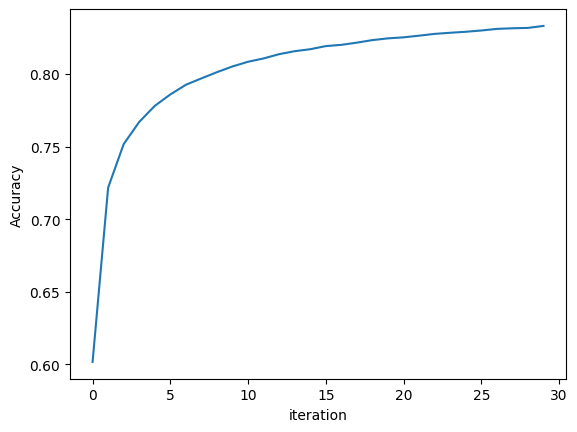

In [5]:
import matplotlib.pyplot as plt
#%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
#plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
#plt.legend()